In [ ]:
!pip install -U classiq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 370.9/370.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12
  Attempting uninstall: pydantic
    Found existing ins

Here we have used the Classiq SDK To Calculate the Maximum independent set using Gate based QAOA
Gate-based Quantum Approximate Optimization Algorithm (QAOA) is a quantum algorithm designed for solving combinatorial optimization problems.  These are problems where the goal is to find the best solution from a finite set of possible solutions. Examples include the Traveling Salesman Problem, Maximum Cut, and the Maximum Independent Set Problem.
QAOA Objective Function Gate-based QAOA aims to minimize or maximize an objective function that represents the optimization problem. The objective function maps candidate solutions to real numbers, with the optimal solution corresponding to the minimum or maximum value.


In [ ]:
from classiq import*

we do the necessary imports


In [ ]:
# All the imports needed
from classiq import *

from classiq.interface.backend.backend_preferences import ClassiqBackendPreferences
from classiq.interface.executor.execution_preferences import ExecutionPreferences
from classiq.interface.model.model import Model as Model_Designer

import numpy as np
import json

In [ ]:
from typing import cast

import networkx as nx
import numpy as np
import pyomo.core as pyo
from IPython.display import Markdown, display
from matplotlib import pyplot as plt

Here we define a mathematical optimization model using the Pyomo library for the Maximum Independent Set (MIS) problem. The MIS problem aims to find the largest possible subset of vertices in a graph such that no two vertices in the subset are adjacent (i.e., connected by an edge).

In [ ]:
import networkx as nx
import pyomo.core as pyo


def mis(graph: nx.Graph) -> pyo.ConcreteModel:
    model = pyo.ConcreteModel()
    model.x = pyo.Var(graph.nodes, domain=pyo.Binary)

    @model.Constraint(graph.edges)
    def independent_rule(model, node1, node2):
        return model.x[node1] + model.x[node2] <= 1

    model.cost = pyo.Objective(expr=sum(model.x.values()), sense=pyo.maximize)

    return model

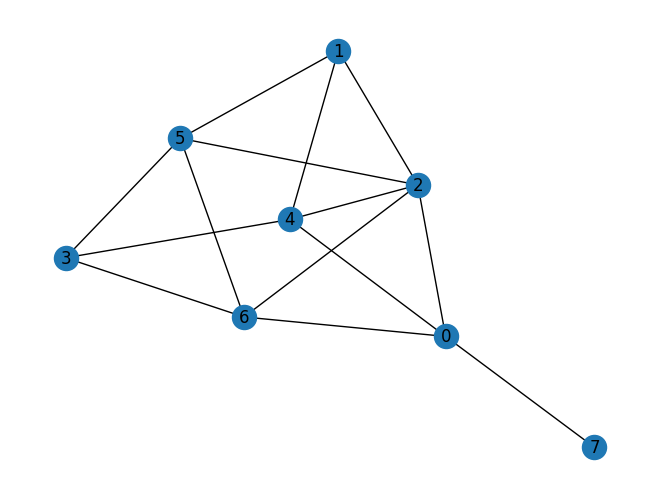

In [ ]:
import networkx as nx

num_nodes = 8
p_edge = 0.4
graph = nx.fast_gnp_random_graph(n=num_nodes, p=p_edge, seed=12345)

nx.draw_kamada_kawai(graph, with_labels=True)
mis_model = mis(graph)

In [ ]:
mis_model.pprint()

2 Set Declarations
    independent_rule_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     2 :    Any :   14 : {(0, 2), (0, 4), (0, 6), (0, 7), (1, 2), (1, 4), (1, 5), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (5, 6)}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    8 : {0, 1, 2, 3, 4, 5, 6, 7}

1 Var Declarations
    x : Size=8, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :     1 : False :  True : Binary
          1 :     0 :  None :     1 : False :  True : Binary
          2 :     0 :  None :     1 : False :  True : Binary
          3 :     0 :  None :     1 : False :  True : Binary
          4 :     0 :  None :     1 : False :  True : Binary
          5 :     0 :  None :     1 : False :  True : Binary
          6 :     0 :  None :     1 : False :  True : Binary
          7 :     0 : 

In [ ]:
from classiq import construct_combinatorial_optimization_model
from classiq.applications.combinatorial_optimization import OptimizerConfig, QAOAConfig

qaoa_config = QAOAConfig(num_layers=3)

In [ ]:
optimizer_config = OptimizerConfig(max_iteration=60, alpha_cvar=0.7)

In [ ]:
qmod = construct_combinatorial_optimization_model(
    pyo_model=mis_model,
    qaoa_config=qaoa_config,
    optimizer_config=optimizer_config,
)

In [ ]:
from classiq import set_execution_preferences
from classiq.execution import ClassiqBackendPreferences, ExecutionPreferences

backend_preferences = ExecutionPreferences(
    backend_preferences=ClassiqBackendPreferences(backend_name="aer_simulator")
)

qmod = set_execution_preferences(qmod, backend_preferences)

In [ ]:
with open("max_independent_set.qmod", "w") as f:
    f.write(qmod)

In [ ]:
from classiq import show, synthesize

qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/a8278ae8-8a13-41a9-b991-5a77f27b183c?version=0.37.1


In [ ]:
from classiq import execute

res = execute(qprog).result()

In [ ]:
best_solution = optimization_result.solution[optimization_result.cost.idxmax()]

In [ ]:
independent_set = [node for node in graph.nodes if best_solution[node] == 1]
print("Independent Set: ", independent_set)
print("Size of Independent Set: ", len(independent_set))

Independent Set:  [2, 3, 7]
Size of Independent Set:  3


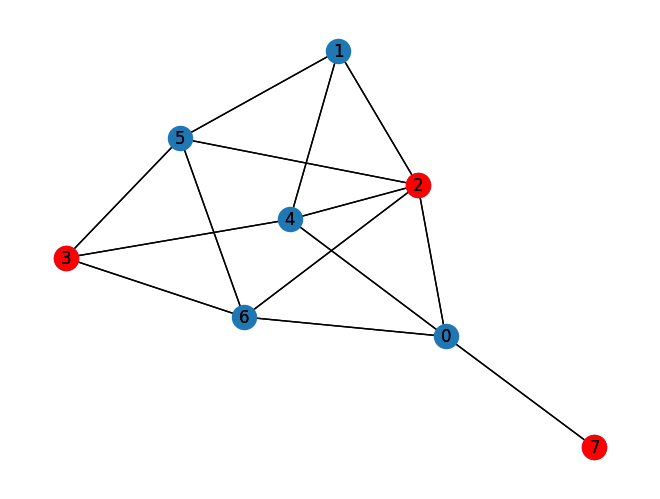

In [ ]:
nx.draw_kamada_kawai(graph, with_labels=True)
nx.draw_kamada_kawai(
    graph,
    with_labels=True,
    nodelist=independent_set,
    node_color="r",
)

Here we have a Python script that utilizes the Classiq library to find the Maximum Independent Set (MIS) for randomly generated graphs of different sizes.  We import the necessary libraries including NetworkX for graph operations, NumPy for numerical computations, Pyomo for modeling optimization problems, and various components from the Classiq library for quantum optimization.

The mis function defines a Pyomo ConcreteModel representing the MIS optimization model. It creates a binary variable for each node in the graph, adds constraints to ensure that no two adjacent nodes are both included in the independent set, and defines the objective function to maximize the total number of nodes in the independent set.

The find_mis function iterates over a list of the number of nodes for each graph. For each number of nodes:

It generates a random graph using NetworkX.
Defines the MIS Pyomo model for the graph.
Constructs the QAOA (Quantum Approximate Optimization Algorithm) optimization model using the Classiq library.
Sets execution preferences for quantum backend simulation.
Executes the quantum program, synthesizes it, and extracts optimization results.
Prints the independent set and its size for the graph.
Plots the graph with the independent set highlighted in red.
List of Number of Nodes: The num_nodes_list contains the number of nodes for each graph.

 Finally, the find_mis function is called with the list of number of nodes to find the MIS for each graph.

Graph with 3 nodes:
Independent Set:  [0, 1]
Size of Independent Set:  2


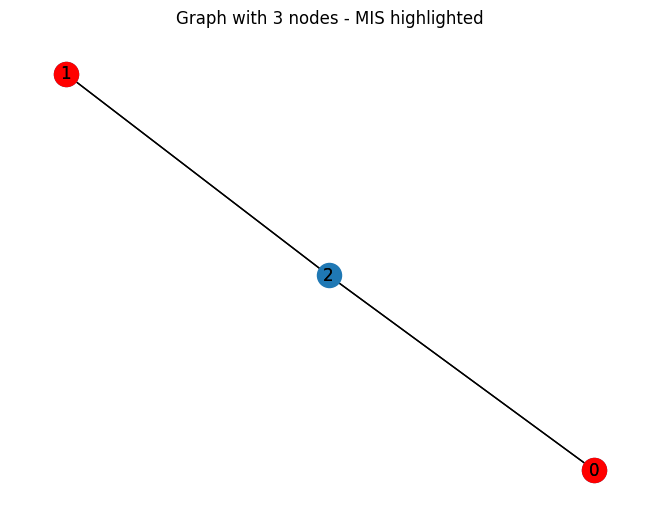

Graph with 5 nodes:
Independent Set:  [0, 1, 3]
Size of Independent Set:  3


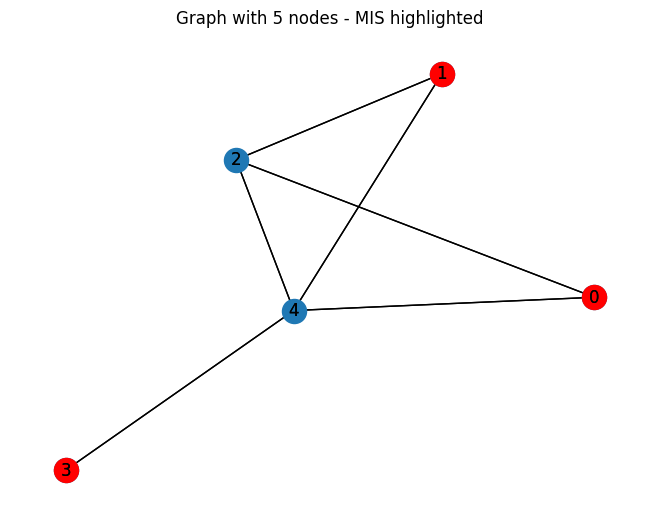

Graph with 6 nodes:
Independent Set:  [0, 1, 3]
Size of Independent Set:  3


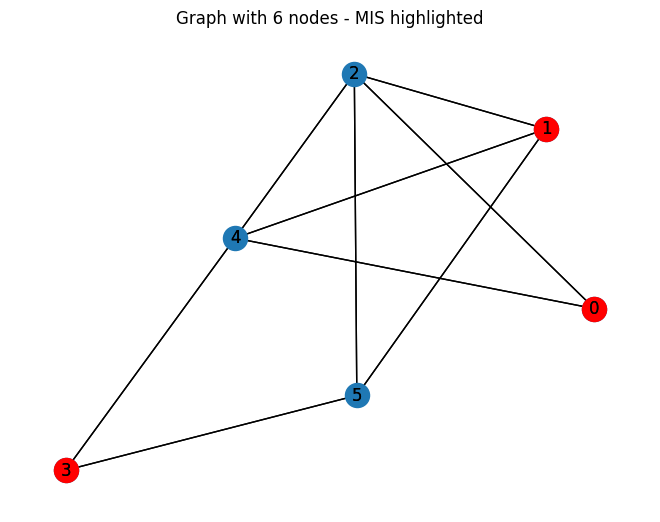

Graph with 7 nodes:
Independent Set:  [0, 1, 3]
Size of Independent Set:  3


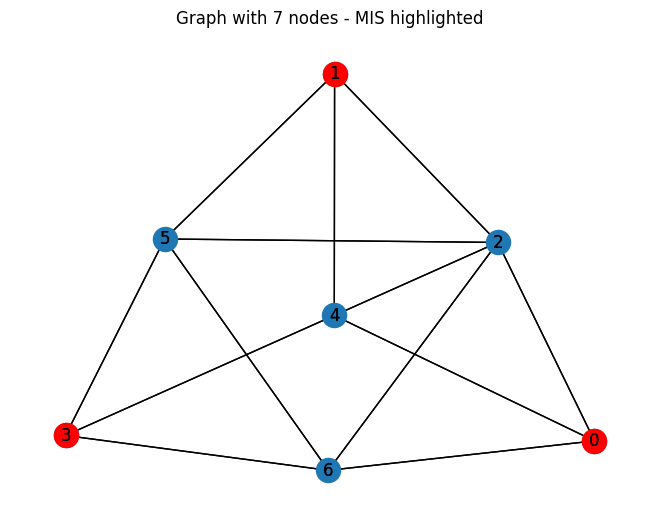

In [ ]:
# Import necessary libraries
import networkx as nx
import numpy as np
import pyomo.core as pyo
from classiq import construct_combinatorial_optimization_model, set_execution_preferences, execute
from classiq.applications.combinatorial_optimization import OptimizerConfig, QAOAConfig
from classiq.execution import ExecutionPreferences
import pandas as pd

# Function to define the MIS Pyomo model
def mis(graph: nx.Graph) -> pyo.ConcreteModel:
    model = pyo.ConcreteModel()
    model.x = pyo.Var(graph.nodes, domain=pyo.Binary)

    @model.Constraint(graph.edges)
    def independent_rule(model, node1, node2):
        return model.x[node1] + model.x[node2] <= 1

    model.cost = pyo.Objective(expr=sum(model.x.values()), sense=pyo.maximize)

    return model

# Function to generate random graphs and find MIS for each
def find_mis(num_nodes_list):
    for num_nodes in num_nodes_list:
        # Generate random graph
        graph = nx.fast_gnp_random_graph(n=num_nodes, p=0.4, seed=12345)

        # Define MIS Pyomo model
        mis_model = mis(graph)

        # Construct QAOA optimization model
        qaoa_config = QAOAConfig(num_layers=3)
        optimizer_config = OptimizerConfig(max_iteration=60, alpha_cvar=0.7)
        qmod = construct_combinatorial_optimization_model(pyo_model=mis_model, qaoa_config=qaoa_config, optimizer_config=optimizer_config)

        # Set execution preferences
        backend_preferences = ExecutionPreferences(backend_preferences=ClassiqBackendPreferences(backend_name="aer_simulator"))
        qmod = set_execution_preferences(qmod, backend_preferences)

        # Execute the quantum program
        qprog = synthesize(qmod)
        res = execute(qprog).result()

        # Extract optimization results
        optimization_result = pd.DataFrame.from_records(res[0].value)
        best_solution = optimization_result.solution[optimization_result.cost.idxmax()]

        # Extract independent set from best solution
        independent_set = [node for node in graph.nodes if best_solution[node] == 1]

        # Print results
        print(f"Graph with {num_nodes} nodes:")
        print("Independent Set: ", independent_set)
        print("Size of Independent Set: ", len(independent_set))

        # Plot graph with independent set highlighted
        plt.figure()
        nx.draw_kamada_kawai(graph, with_labels=True)
        nx.draw_kamada_kawai(graph, with_labels=True, nodelist=independent_set, node_color="r")
        plt.title(f"Graph with {num_nodes} nodes - MIS highlighted")
        plt.show()

# List of number of nodes for each graph
num_nodes_list = [3, 5, 6, 7]

# Find MIS for each graph
find_mis(num_nodes_list)


In [ ]:
from classiq import execute

res = execute(qprog).result()

Here we have a section of code that deals with processing optimization results obtained from a quantum program.  The optimization_result = pd.DataFrame.from_records(res[0].value) line creates a Pandas DataFrame from the optimization results obtained from the quantum program. It converts the optimization results, which are typically returned as a list of dictionaries or records, into a DataFrame format.

 The optimization_result.sort_values(by="cost", ascending=False) line sorts the DataFrame based on the values in the "cost" column in descending order. This means that the rows will be rearranged such that the highest values of "cost" appear first.

 The .head(5) method is then used to select the top 5 rows from the sorted DataFrame. This will return the 5 rows with the highest values of "cost".
here we get the optimization results obtained from a quantum program by converting them into a DataFrame, sorting them based on the "cost" column in descending order, and then selecting the top 5 results with the highest "cost" values for further analysis or display.

In [ ]:
import pandas as pd

optimization_result = pd.DataFrame.from_records(res[0].value)
optimization_result.sort_values(by="cost", ascending=False).head(5)

,probability,cost,solution,count
0,0.039551,3.0,"[0, 0, 1, 1, 0, 0, 0, 1]",81
29,0.008789,3.0,"[0, 0, 0, 0, 1, 0, 1, 1]",18
150,0.000977,3.0,"[1, 1, 0, 1, 0, 0, 0, 0]",2
62,0.004883,3.0,"[0, 0, 0, 0, 1, 1, 0, 1]",10
20,0.011719,3.0,"[0, 1, 0, 0, 0, 0, 1, 1]",24


array([[<Axes: title={'center': 'cost'}>]], dtype=object)

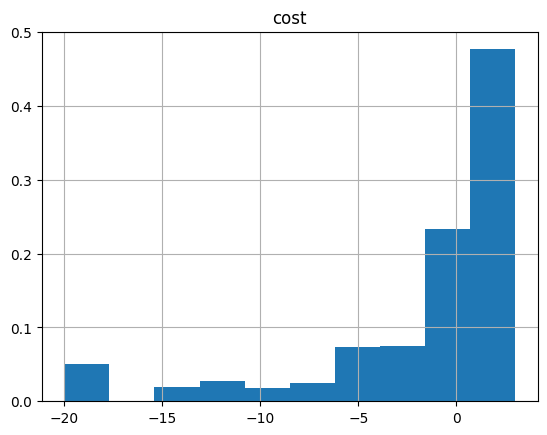

In [ ]:
optimization_result.hist("cost", weights=optimization_result["probability"])